Part 1 – Basic Data Understanding (Pandas)

In [1496]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('D:\\Projects\\DataSet\\World-happiness-report-2024.csv')
df.head(10)

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,Western Europe,7.319,7.383,7.256,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,Western Europe,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,Western Europe,7.122,7.213,7.031,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,Western Europe,7.060,7.147,6.973,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,North America and ANZ,7.057,7.141,6.973,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [1497]:
df.shape

(143, 12)

In [1498]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

In [1499]:
df.dtypes

Country name                     object
Regional indicator               object
Ladder score                    float64
upperwhisker                    float64
lowerwhisker                    float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object

In [1500]:
a = df.copy()
a = a.drop(['Country name', 'Regional indicator'], axis=1)
a

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...,...
138,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


In [1501]:
a.skew()

Ladder score                   -0.521820
upperwhisker                   -0.547456
lowerwhisker                   -0.499001
Log GDP per capita             -0.507127
Social support                 -0.992283
Healthy life expectancy        -0.546061
Freedom to make life choices   -1.018833
Generosity                      0.663054
Perceptions of corruption       1.524926
Dystopia + residual            -0.601796
dtype: float64

In [1502]:
df.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

In [1503]:
df.duplicated().sum()

np.int64(0)

In [1504]:
df.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [1505]:
df[df.isnull().any(axis=1)]

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
61,Bahrain,Middle East and North Africa,5.959,6.153,5.766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,Tajikistan,Commonwealth of Independent States,5.281,5.361,5.201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,State of Palestine,Middle East and North Africa,4.879,5.006,4.753,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1506]:
df=df.fillna(df.mean(numeric_only=True))

In [1507]:
df[df.isnull().any(axis=1)]

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual


In [1508]:
df['Country name'].unique().size

143

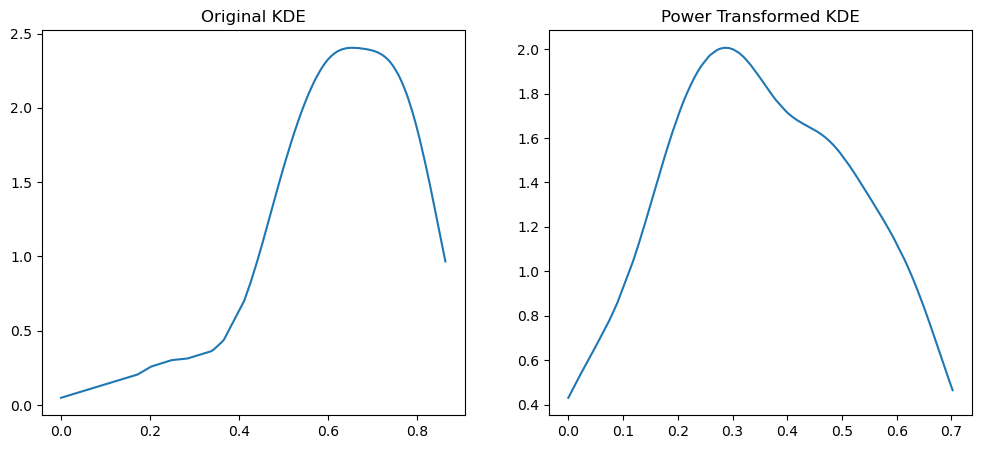

In [1509]:
from scipy.stats import gaussian_kde

x = pd.to_numeric(df['Freedom to make life choices'], errors='coerce')

pow_x = np.power(x, 2.4)

kde1 = gaussian_kde(x)
kde2 = gaussian_kde(pow_x)

x_sorted = np.sort(x)
pow_sorted = np.sort(pow_x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(x_sorted, kde1(x_sorted))
ax1.set_title("Original KDE")

ax2.plot(pow_sorted, kde2(pow_sorted))
ax2.set_title("Power Transformed KDE")

plt.show()

In [1510]:
df['Freedom to make life choices'] = np.power(
    pd.to_numeric(df['Freedom to make life choices'], errors='coerce'),
    2.4
)

In [1511]:
df['Freedom to make life choices'].skew()

np.float64(0.02698420826404136)

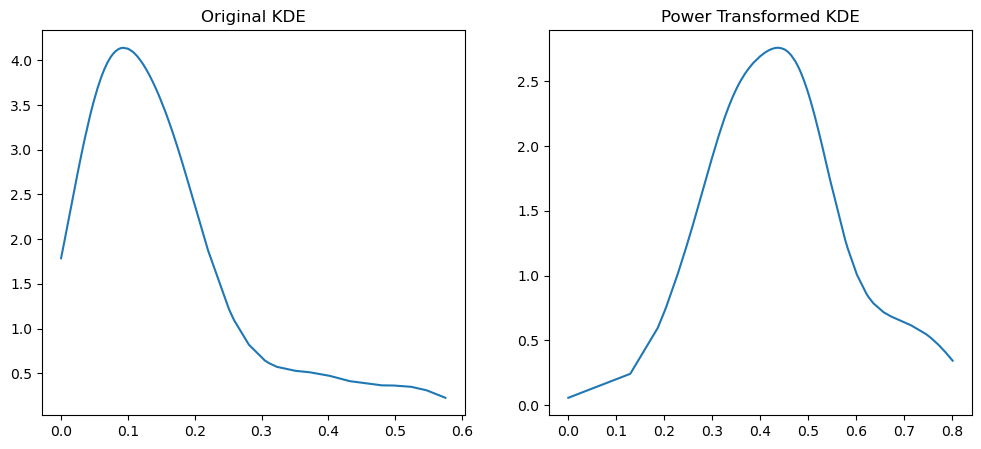

In [1512]:
from scipy.stats import gaussian_kde

x = pd.to_numeric(df['Perceptions of corruption'], errors='coerce')

pow_x = np.power(x, 0.4)

kde1 = gaussian_kde(x)
kde2 = gaussian_kde(pow_x)

x_sorted = np.sort(x)
pow_sorted = np.sort(pow_x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(x_sorted, kde1(x_sorted))
ax1.set_title("Original KDE")

ax2.plot(pow_sorted, kde2(pow_sorted))
ax2.set_title("Power Transformed KDE")

plt.show()

In [1513]:
df['Perceptions of corruption'] = np.power(
    pd.to_numeric(df['Perceptions of corruption'], errors='coerce'),
    0.4
)

In [1514]:
df['Perceptions of corruption'].skew()

np.float64(0.2769139958034641)

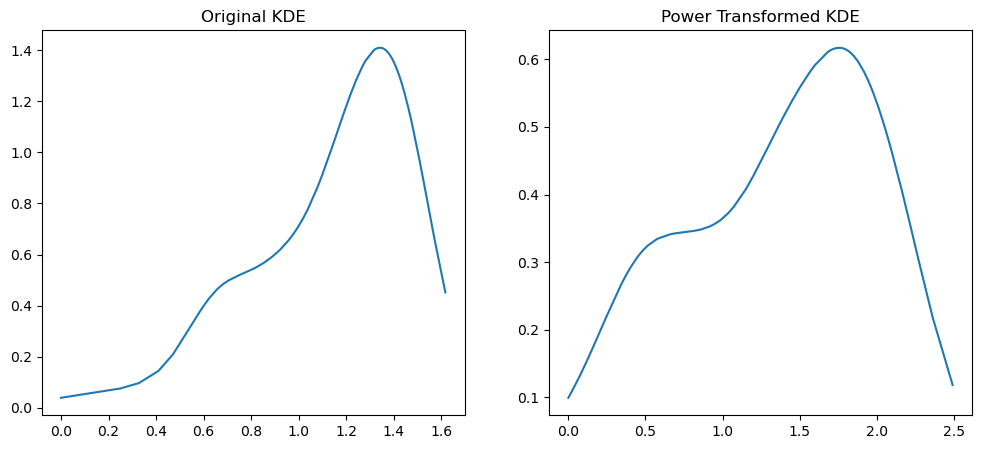

In [1515]:
from scipy.stats import gaussian_kde

x = pd.to_numeric(df['Social support'], errors='coerce')

pow_x = np.power(x, 1.9)

kde1 = gaussian_kde(x)
kde2 = gaussian_kde(pow_x)

x_sorted = np.sort(x)
pow_sorted = np.sort(pow_x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(x_sorted, kde1(x_sorted))
ax1.set_title("Original KDE")

ax2.plot(pow_sorted, kde2(pow_sorted))
ax2.set_title("Power Transformed KDE")

plt.show()

In [1516]:
df['Social support'] = np.power(
    pd.to_numeric(df['Social support'], errors='coerce'),
    3
)

In [1517]:
df['Social support'].skew()

np.float64(0.02306286072247852)

In [1518]:
df['Regional indicator'].unique().size

10

In [1519]:
max_value = df["Ladder score"].max()
df[df["Ladder score"] == max_value]

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,3.884701,0.695,0.694358,0.142,0.785013,2.082


In [1520]:
df['Regional indicator'].value_counts()

Regional indicator
Sub-Saharan Africa                    35
Western Europe                        20
Latin America and Caribbean           19
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    10
Southeast Asia                         9
East Asia                              6
South Asia                             6
North America and ANZ                  4
Name: count, dtype: int64

Part 2 – EDA (Exploratory Data Analysis)


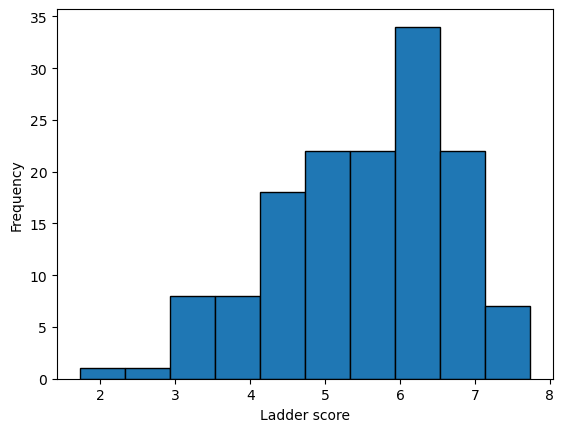

In [1521]:
x=df['Ladder score']
plt.hist(x,edgecolor='black')
plt.xlabel('Ladder score')
plt.ylabel('Frequency')
plt.show()

In [1522]:
a=df.sort_values(by="Ladder score",ascending=False)
a['Country name'].head(10)

0        Finland
1        Denmark
2        Iceland
3         Sweden
4         Israel
5    Netherlands
6         Norway
7     Luxembourg
8    Switzerland
9      Australia
Name: Country name, dtype: object

In [1523]:
a['Country name'].tail(10)

133              Zambia
134            Eswatini
135              Malawi
136            Botswana
137            Zimbabwe
138    Congo (Kinshasa)
139        Sierra Leone
140             Lesotho
141             Lebanon
142         Afghanistan
Name: Country name, dtype: object

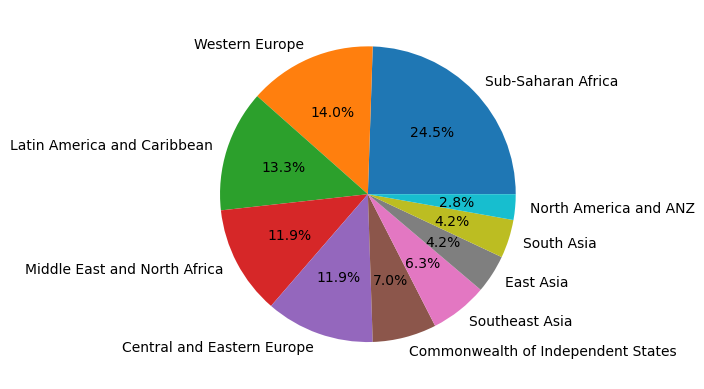

In [1524]:
reg=df['Regional indicator']
reg.value_counts()
plt.pie(reg.value_counts(),labels=reg.value_counts().index,autopct='%1.1f%%')
plt.show()

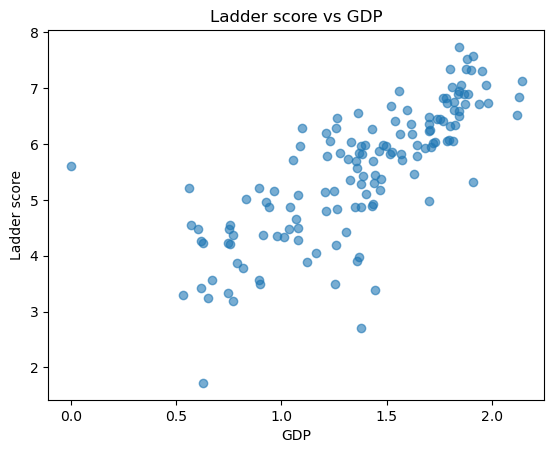

In [1525]:
x=df['Log GDP per capita']
y=df['Ladder score']
plt.scatter(x,y,alpha=0.6)
plt.xlabel('GDP')
plt.ylabel('Ladder score')
plt.title('Ladder score vs GDP')
plt.show()

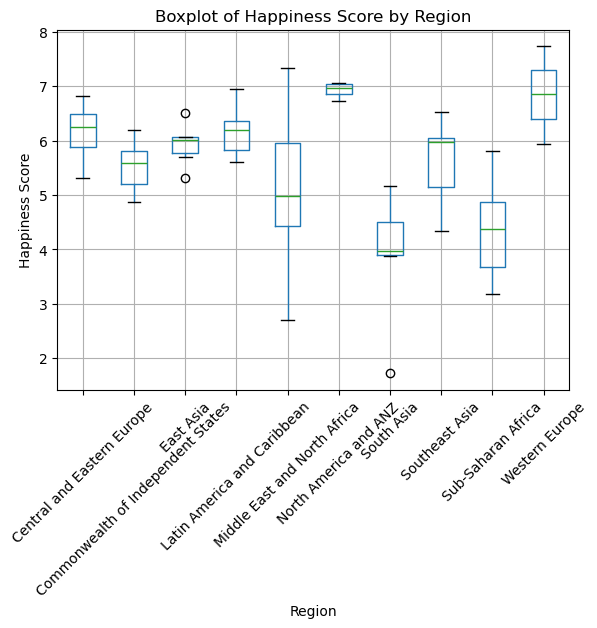

In [1526]:
df.boxplot(column="Ladder score", by="Regional indicator")
plt.xlabel("Region")
plt.ylabel("Happiness Score")
plt.title("Boxplot of Happiness Score by Region")
plt.xticks(rotation=45)
plt.suptitle("")
plt.show()

Part 3 – Statistics

In [1527]:
avg=df['Ladder score'].mean()
avg

np.float64(5.52758041958042)

In [1528]:
df['Ladder score'].median()

5.785

In [1529]:
df['Ladder score'].mode()

0    3.502
1    5.816
2    6.188
Name: Ladder score, dtype: float64

In [1530]:
df['Ladder score'].var()

1.3705771466561611

In [1531]:
df['Ladder score'].std()

1.1707165099442995

In [1532]:
df[df['Ladder score']<avg][['Country name','Ladder score']]

,Country name,Ladder score
80,Bulgaria,5.463
81,Armenia,5.455
82,South Africa,5.422
83,North Macedonia,5.369
84,Algeria,5.364
...,...,...
138,Congo (Kinshasa),3.295
139,Sierra Leone,3.245
140,Lesotho,3.186
141,Lebanon,2.707


In [1533]:
x=df.sort_values(by='Ladder score',ascending=False).head(20)
x

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,3.884701,0.695,0.694358,0.142,0.785013,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,3.511808,0.699,0.626556,0.204,0.786162,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,4.227952,0.718,0.619272,0.258,0.505858,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,3.381755,0.724,0.654313,0.221,0.772205,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,3.463513,0.740,0.343921,0.153,0.517873,2.298
5,Netherlands,Western Europe,7.319,7.383,7.256,1.901,3.124943,0.706,0.462180,0.247,0.673313,1.906
6,Norway,Western Europe,7.302,7.389,7.215,1.952,3.491055,0.704,0.648705,0.224,0.748063,1.586
7,Luxembourg,Western Europe,7.122,7.213,7.031,2.141,2.487814,0.708,0.587108,0.146,0.714815,1.540
8,Switzerland,Western Europe,7.060,7.147,6.973,1.970,2.893641,0.747,0.515918,0.173,0.756644,1.488
9,Australia,North America and ANZ,7.057,7.141,6.973,1.854,3.118535,0.692,0.511037,0.225,0.636328,1.745


In [1534]:
x['Regional indicator'].unique()

array(['Western Europe', 'Middle East and North Africa',
       'North America and ANZ', 'Latin America and Caribbean',
       'Central and Eastern Europe'], dtype=object)

Part 4 – Linear Algebra & NumPy

In [1535]:
x=np.array(df['Ladder score'])
y=np.array(df['Log GDP per capita'])
z=x+y
z

array([9.585     , 9.491     , 9.406     , 9.222     , 9.144     ,
       9.22      , 9.254     , 9.263     , 9.03      , 8.911     ,
       8.839     , 8.516     , 8.796     , 8.79      , 8.74      ,
       8.762     , 8.967     , 8.605     , 8.584     , 8.571     ,
       8.529     , 8.716     , 8.664     , 8.59      , 8.199     ,
       8.207     , 8.427     , 8.436     , 7.925     , 8.641     ,
       8.345     , 8.19      , 7.734     , 8.2       , 8.18      ,
       8.187     , 7.949     , 7.976     , 8.06      , 8.173     ,
       8.124     , 7.547     , 7.381     , 7.702     , 7.963     ,
       7.934     , 7.407     , 7.75      , 7.81      , 7.862     ,
       7.846     , 7.873     , 7.28      , 7.374     , 7.758     ,
       7.739     , 7.375     , 7.46      , 7.621     , 7.47      ,
       7.059     , 7.33780714, 7.652     , 7.618     , 7.342     ,
       7.392     , 7.122     , 7.212     , 7.34      , 7.386     ,
       7.201     , 7.427     , 7.001     , 7.04      , 6.768  

In [1536]:
np.dot(x,y)

np.float64(1143.5100863357143)

In [1537]:
mat = df[['Log GDP per capita', 'Social support']].values
mat

array([[1.84400000e+00, 3.88470125e+00],
       [1.90800000e+00, 3.51180800e+00],
       [1.88100000e+00, 4.22795211e+00],
       [1.87800000e+00, 3.38175450e+00],
       [1.80300000e+00, 3.46351270e+00],
       [1.90100000e+00, 3.12494313e+00],
       [1.95200000e+00, 3.49105541e+00],
       [2.14100000e+00, 2.48781388e+00],
       [1.97000000e+00, 2.89364063e+00],
       [1.85400000e+00, 3.11853518e+00],
       [1.81000000e+00, 3.56055018e+00],
       [1.56100000e+00, 2.58828212e+00],
       [1.84500000e+00, 2.53771654e+00],
       [1.88500000e+00, 2.38462106e+00],
       [1.84000000e+00, 3.10574558e+00],
       [1.86800000e+00, 2.98598400e+00],
       [2.12900000e+00, 2.68561900e+00],
       [1.78300000e+00, 3.44979583e+00],
       [1.76600000e+00, 3.07392466e+00],
       [1.82200000e+00, 2.33147398e+00],
       [1.78600000e+00, 3.38851801e+00],
       [1.98300000e+00, 1.57709894e+00],
       [1.93900000e+00, 2.69722829e+00],
       [1.87100000e+00, 2.68561900e+00],
       [1.521000

In [1538]:
np.dot(mat,0.5)

array([[9.22000000e-01, 1.94235062e+00],
       [9.54000000e-01, 1.75590400e+00],
       [9.40500000e-01, 2.11397606e+00],
       [9.39000000e-01, 1.69087725e+00],
       [9.01500000e-01, 1.73175635e+00],
       [9.50500000e-01, 1.56247156e+00],
       [9.76000000e-01, 1.74552771e+00],
       [1.07050000e+00, 1.24390694e+00],
       [9.85000000e-01, 1.44682031e+00],
       [9.27000000e-01, 1.55926759e+00],
       [9.05000000e-01, 1.78027509e+00],
       [7.80500000e-01, 1.29414106e+00],
       [9.22500000e-01, 1.26885827e+00],
       [9.42500000e-01, 1.19231053e+00],
       [9.20000000e-01, 1.55287279e+00],
       [9.34000000e-01, 1.49299200e+00],
       [1.06450000e+00, 1.34280950e+00],
       [8.91500000e-01, 1.72489792e+00],
       [8.83000000e-01, 1.53696233e+00],
       [9.11000000e-01, 1.16573699e+00],
       [8.93000000e-01, 1.69425900e+00],
       [9.91500000e-01, 7.88549472e-01],
       [9.69500000e-01, 1.34861414e+00],
       [9.35500000e-01, 1.34280950e+00],
       [7.605000

In [1539]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['Ladder score']])
df['Scaled'] = scaled
df

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Scaled
0,Finland,Western Europe,7.741,7.815,7.667,1.844,3.884701,0.695,0.694358,0.142,0.785013,2.082,1.000000
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,3.511808,0.699,0.626556,0.204,0.786162,1.881,0.973754
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,4.227952,0.718,0.619272,0.258,0.505858,2.050,0.964120
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,3.381755,0.724,0.654313,0.221,0.772205,1.658,0.934053
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,3.463513,0.740,0.343921,0.153,0.517873,2.298,0.933555
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.294080,0.262,0.165831,0.189,0.349086,1.102,0.261462
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.181321,0.253,0.162486,0.181,0.308824,1.068,0.253156
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.616295,0.000,0.211059,0.082,0.373050,0.875,0.243355
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.192100,0.556,0.014836,0.068,0.242638,-0.073,0.163787


In [1540]:
import sympy as sp

Happiness, gdp = sp.symbols('happiness gdp')
wellbeing=(gdp * Happiness) + 0.5 * (Happiness - 5)**2
der=sp.diff(wellbeing,Happiness)
sp.pprint(der)

gdp + 1.0⋅happiness - 5.0


In [1541]:
val = der.subs({Happiness: 7.741, gdp: 1.844})
print("Derivative value:", val)

Derivative value: 4.58500000000000


Part 6 – Feature Engineering


In [1542]:
df['is_happy'] = df['Ladder score'].apply(lambda x: 1 if x >= 7 else 0)
df

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Scaled,is_happy
0,Finland,Western Europe,7.741,7.815,7.667,1.844,3.884701,0.695,0.694358,0.142,0.785013,2.082,1.000000,1
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,3.511808,0.699,0.626556,0.204,0.786162,1.881,0.973754,1
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,4.227952,0.718,0.619272,0.258,0.505858,2.050,0.964120,1
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,3.381755,0.724,0.654313,0.221,0.772205,1.658,0.934053,1
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,3.463513,0.740,0.343921,0.153,0.517873,2.298,0.933555,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.294080,0.262,0.165831,0.189,0.349086,1.102,0.261462,0
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.181321,0.253,0.162486,0.181,0.308824,1.068,0.253156,0
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.616295,0.000,0.211059,0.082,0.373050,0.875,0.243355,0
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.192100,0.556,0.014836,0.068,0.242638,-0.073,0.163787,0


In [1543]:
df['rank']=df['Ladder score'].rank(ascending=False).astype(int)

In [1544]:
df

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Scaled,is_happy,rank
0,Finland,Western Europe,7.741,7.815,7.667,1.844,3.884701,0.695,0.694358,0.142,0.785013,2.082,1.000000,1,1
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,3.511808,0.699,0.626556,0.204,0.786162,1.881,0.973754,1,2
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,4.227952,0.718,0.619272,0.258,0.505858,2.050,0.964120,1,3
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,3.381755,0.724,0.654313,0.221,0.772205,1.658,0.934053,1,4
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,3.463513,0.740,0.343921,0.153,0.517873,2.298,0.933555,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.294080,0.262,0.165831,0.189,0.349086,1.102,0.261462,0,139
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.181321,0.253,0.162486,0.181,0.308824,1.068,0.253156,0,140
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.616295,0.000,0.211059,0.082,0.373050,0.875,0.243355,0,141
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.192100,0.556,0.014836,0.068,0.242638,-0.073,0.163787,0,142


In [1545]:
df['above_average_gdp']=df['Log GDP per capita'].apply(lambda x: 1 if x > df['Log GDP per capita'].mean() else 0)
df

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Scaled,is_happy,rank,above_average_gdp
0,Finland,Western Europe,7.741,7.815,7.667,1.844,3.884701,0.695,0.694358,0.142,0.785013,2.082,1.000000,1,1,1
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,3.511808,0.699,0.626556,0.204,0.786162,1.881,0.973754,1,2,1
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,4.227952,0.718,0.619272,0.258,0.505858,2.050,0.964120,1,3,1
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,3.381755,0.724,0.654313,0.221,0.772205,1.658,0.934053,1,4,1
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,3.463513,0.740,0.343921,0.153,0.517873,2.298,0.933555,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.294080,0.262,0.165831,0.189,0.349086,1.102,0.261462,0,139,0
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.181321,0.253,0.162486,0.181,0.308824,1.068,0.253156,0,140,0
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.616295,0.000,0.211059,0.082,0.373050,0.875,0.243355,0,141,0
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.192100,0.556,0.014836,0.068,0.242638,-0.073,0.163787,0,142,0


Part 7 – SQL Simulation in Pandas


In [1546]:
df[df['Ladder score'] > 7]['Country name']

0         Finland
1         Denmark
2         Iceland
3          Sweden
4          Israel
5     Netherlands
6          Norway
7      Luxembourg
8     Switzerland
9       Australia
10    New Zealand
Name: Country name, dtype: object

In [1547]:
df.sort_values(by='Log GDP per capita',ascending=False)[['Country name','Log GDP per capita']]

,Country name,Log GDP per capita
7,Luxembourg,2.141
16,Ireland,2.129
29,Singapore,2.118
21,United Arab Emirates,1.983
8,Switzerland,1.970
...,...,...
112,Chad,0.603
108,Niger,0.573
89,Mozambique,0.560
138,Congo (Kinshasa),0.534


In [1548]:
df.groupby('Regional indicator')['Ladder score'].mean()

Regional indicator
Central and Eastern Europe            6.170941
Commonwealth of Independent States    5.538500
East Asia                             5.934333
Latin America and Caribbean           6.143368
Middle East and North Africa          5.199941
North America and ANZ                 6.927750
South Asia                            3.895667
Southeast Asia                        5.551889
Sub-Saharan Africa                    4.329686
Western Europe                        6.841650
Name: Ladder score, dtype: float64

In [1549]:
df.groupby('Regional indicator')['Ladder score'].mean().head(5)

Regional indicator
Central and Eastern Europe            6.170941
Commonwealth of Independent States    5.538500
East Asia                             5.934333
Latin America and Caribbean           6.143368
Middle East and North Africa          5.199941
Name: Ladder score, dtype: float64

In [1550]:
df[df['Healthy life expectancy']>0.7]['Country name']

2                       Iceland
3                        Sweden
4                        Israel
5                   Netherlands
6                        Norway
7                    Luxembourg
8                   Switzerland
14                       Canada
23                      Germany
26                       France
29                    Singapore
35                        Spain
39                        Malta
40                        Italy
49                       Cyprus
50                        Japan
51                  South Korea
85    Hong Kong S.A.R. of China
Name: Country name, dtype: object

Part 8 – Insights

In [1551]:
df.sort_values(by='Ladder score',ascending=False)[['Country name','Ladder score']].head(1)

,Country name,Ladder score
0,Finland,7.741


In [1552]:
means = df.groupby('Regional indicator')['Ladder score'].mean()
region = means.idxmax()
value = means.max()
print(region)
print(value)

North America and ANZ
6.92775


In [1553]:
df['Log GDP per capita'].corr(df['Ladder score'])

np.float64(0.7671814730709576)

In [1554]:
df

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Scaled,is_happy,rank,above_average_gdp
0,Finland,Western Europe,7.741,7.815,7.667,1.844,3.884701,0.695,0.694358,0.142,0.785013,2.082,1.000000,1,1,1
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,3.511808,0.699,0.626556,0.204,0.786162,1.881,0.973754,1,2,1
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,4.227952,0.718,0.619272,0.258,0.505858,2.050,0.964120,1,3,1
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,3.381755,0.724,0.654313,0.221,0.772205,1.658,0.934053,1,4,1
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,3.463513,0.740,0.343921,0.153,0.517873,2.298,0.933555,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.294080,0.262,0.165831,0.189,0.349086,1.102,0.261462,0,139,0
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.181321,0.253,0.162486,0.181,0.308824,1.068,0.253156,0,140,0
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.616295,0.000,0.211059,0.082,0.373050,0.875,0.243355,0,141,0
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.192100,0.556,0.014836,0.068,0.242638,-0.073,0.163787,0,142,0


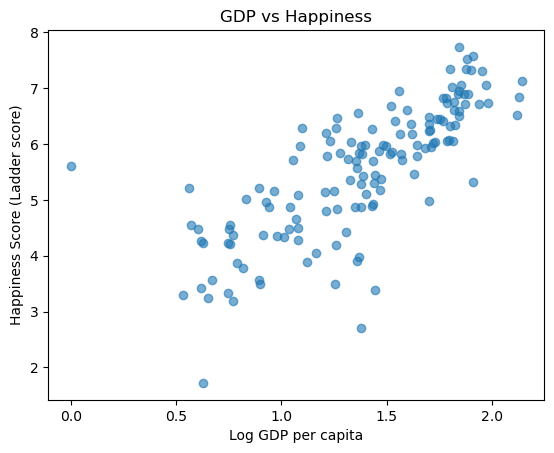

In [1555]:
avg_happiness = df.groupby('Country name')[['Log GDP per capita', 'Ladder score']].mean()
plt.scatter(avg_happiness['Log GDP per capita'], avg_happiness['Ladder score'],alpha=0.6)
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score (Ladder score)')
plt.title('GDP vs Happiness')
plt.show()

In [1556]:
df.groupby('Regional indicator')['Healthy life expectancy'].mean().idxmax()

'Western Europe'

In [1557]:
final=df[['Ladder score','upperwhisker','lowerwhisker','Log GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Dystopia + residual','is_happy','rank']]
final

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,is_happy,rank
0,7.741,7.815,7.667,1.844,3.884701,0.695,0.694358,0.142,0.785013,2.082,1,1
1,7.583,7.665,7.500,1.908,3.511808,0.699,0.626556,0.204,0.786162,1.881,1,2
2,7.525,7.618,7.433,1.881,4.227952,0.718,0.619272,0.258,0.505858,2.050,1,3
3,7.344,7.422,7.267,1.878,3.381755,0.724,0.654313,0.221,0.772205,1.658,1,4
4,7.341,7.405,7.277,1.803,3.463513,0.740,0.343921,0.153,0.517873,2.298,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
138,3.295,3.462,3.128,0.534,0.294080,0.262,0.165831,0.189,0.349086,1.102,0,139
139,3.245,3.366,3.124,0.654,0.181321,0.253,0.162486,0.181,0.308824,1.068,0,140
140,3.186,3.469,2.904,0.771,0.616295,0.000,0.211059,0.082,0.373050,0.875,0,141
141,2.707,2.797,2.616,1.377,0.192100,0.556,0.014836,0.068,0.242638,-0.073,0,142


In [1558]:
from sklearn.preprocessing import StandardScaler
cols=['Ladder score','upperwhisker','lowerwhisker','Log GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Dystopia + residual','is_happy']
final[cols]=StandardScaler().fit_transform(final[cols])
final

C:\Users\Irfan Ahmed J\AppData\Local\Temp\ipykernel_3268\1837727681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final[cols]=StandardScaler().fit_transform(final[cols])


,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,is_happy,rank
0,1.897299,1.888702,1.904544,1.109952,1.921500,1.070816,1.968140,-0.058992,2.368431,0.955080,3.464102,1
1,1.761865,1.758376,1.763375,1.262656,1.579140,1.095417,1.577951,0.797280,2.376285,0.575755,3.464102,2
2,1.712148,1.717541,1.706738,1.198234,2.236644,1.212268,1.536035,1.543066,0.460180,0.894690,3.464102,3
3,1.556999,1.547249,1.566414,1.191076,1.459736,1.249169,1.737690,1.032065,2.280874,0.154911,3.464102,4
4,1.554427,1.532478,1.574867,1.012126,1.534799,1.347570,-0.048543,0.092927,0.542310,1.362713,3.464102,5
...,...,...,...,...,...,...,...,...,...,...,...,...
138,-1.913724,-1.893350,-1.932393,-2.015713,-1.375112,-1.592167,-1.073411,0.590118,-0.611479,-0.894366,-0.288675,139
139,-1.956583,-1.976758,-1.935774,-1.729393,-1.478637,-1.647518,-1.092665,0.479631,-0.886709,-0.958531,-0.288675,140
140,-2.007156,-1.887268,-2.121746,-1.450230,-1.079280,-3.203488,-0.813136,-0.887643,-0.447666,-1.322759,-0.288675,141
141,-2.417746,-2.471127,-2.365200,-0.004312,-1.468741,0.215956,-1.942356,-1.080995,-1.339138,-3.111815,-0.288675,142


In [1559]:
final.skew()

Ladder score                   -0.521820
upperwhisker                   -0.547456
lowerwhisker                   -0.499001
Log GDP per capita             -0.512415
Social support                  0.023063
Healthy life expectancy        -0.551754
Freedom to make life choices    0.026984
Generosity                      0.669967
Perceptions of corruption       0.276914
Dystopia + residual            -0.608071
is_happy                        3.209188
rank                            0.000196
dtype: float64

In [1560]:
corr=final.corr()

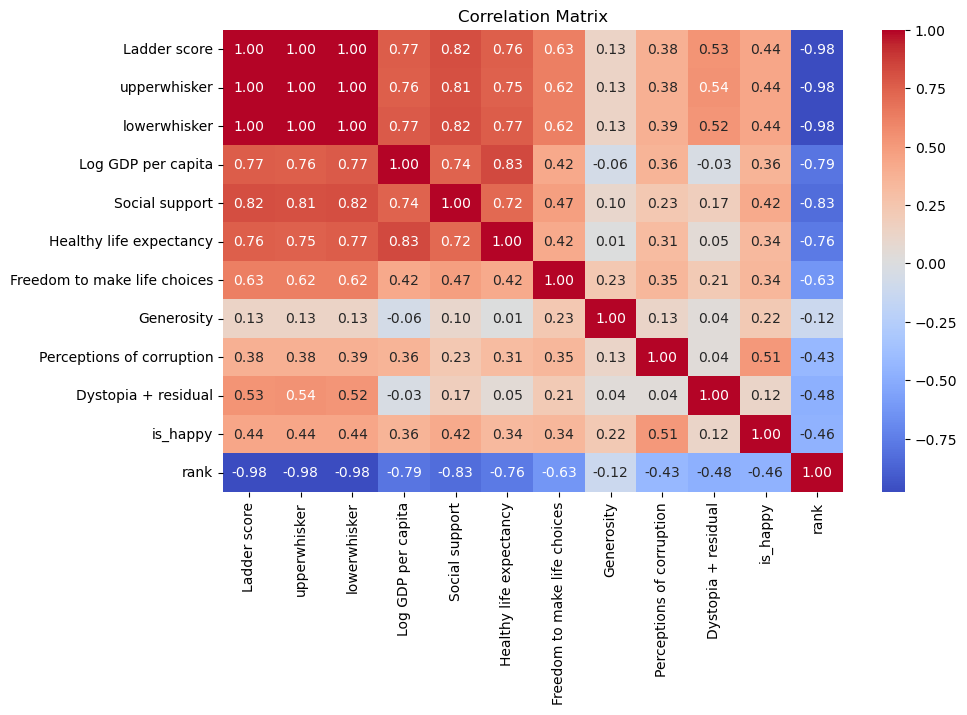

In [1561]:
import seaborn as sn
plt.figure(figsize=(10,6))
sn.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()